In [36]:
import dataloader
import utils
import dtree

import datetime
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

%load_ext autoreload
%autoreload 2

# Model Data range
date = datetime.datetime(2021,3,12)
# Total entry count
count = 180
training_count = 150

history_size = 60


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
# AMZN

In [38]:
path = "./Data/AMZN2021.csv"
# Load data, with yesterday close price.
train_x0, train_y0, test_x0, test_y0 = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)
train_x0 = np.resize(train_x0, (training_count - history_size, history_size))
test_x0 = np.resize(test_x0, (count - training_count, history_size))
train_x1 = np.hstack((train_x0, train_x0))
test_x1 = np.hstack((test_x0, test_x0))
print(train_x0.shape)
print(test_x0.shape)


(1243, 8)
(1243, 8)
(1242, 8)
(1242, 8)
(180, 8)
(90, 60, 1)
(30, 60, 1)
(90, 60)
(30, 60)


In [39]:
path = "./Data/AMZN2021.csv"
date = datetime.datetime(2021,3,13)
# Load data, with today close price as ground truth.
_, train_y, _, test_y = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)


(1243, 8)
(1243, 8)
(1243, 8)
(1243, 8)
(180, 8)
(90, 60, 1)
(30, 60, 1)


In [40]:
criteria_params = ["mse", "mae"]
max_depth_params = [6, 9, 12, 15, 19, 25, 30, 50]
regressor, best_err = dtree.dicision_tree_model_selection(train_x1, train_y, criteria_params, max_depth_params)

mse 6 mean val MSE: 0.121527426757042
mse 9 mean val MSE: 0.13392516560738038
mse 12 mean val MSE: 0.12003422252100823
mse 15 mean val MSE: 0.12343965298284905
mse 19 mean val MSE: 0.1259657452087005
mse 25 mean val MSE: 0.11794783975659409
mse 30 mean val MSE: 0.1258399913540485
mse 50 mean val MSE: 0.1314118194232448
mae 6 mean val MSE: 0.13517096793672542
mae 9 mean val MSE: 0.11389797352701196
mae 12 mean val MSE: 0.1281796954259069
mae 15 mean val MSE: 0.1362421454529113
mae 19 mean val MSE: 0.12010048486042628
mae 25 mean val MSE: 0.12840356921958512
mae 30 mean val MSE: 0.12429015850841654
mae 50 mean val MSE: 0.12164541718578203


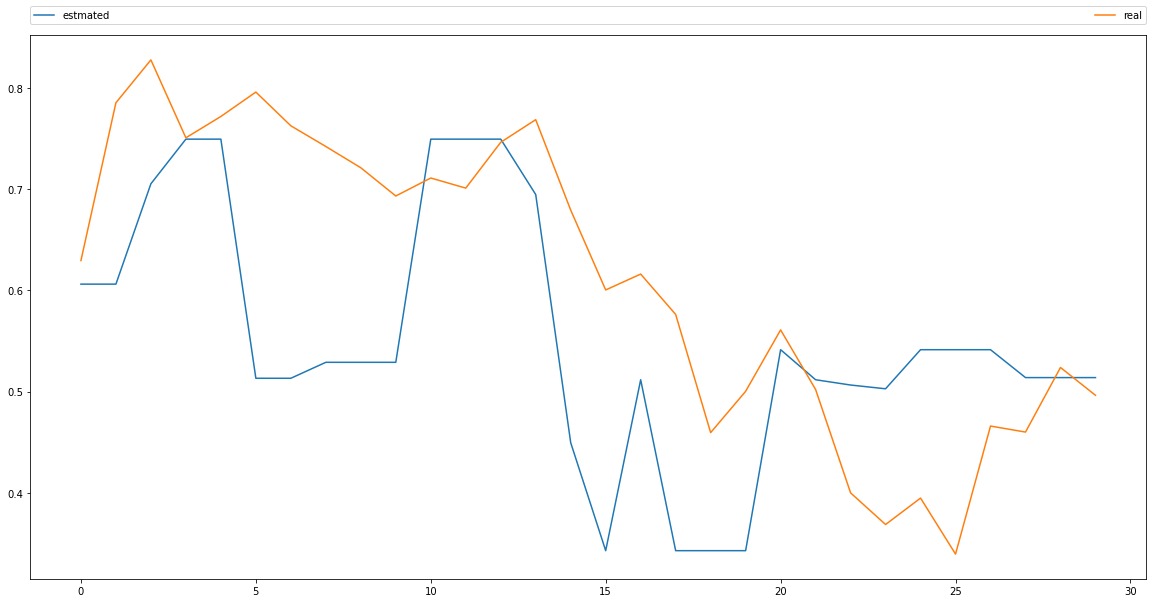

In [41]:
y_hat = regressor.fit(train_x1, train_y).predict(test_x1)
plt.plot(y_hat[:], label="estmated")
plt.plot(test_y[:], label="real")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [42]:
print("MAE:  ", utils.mae(y_hat, test_y))
print("RMSE: ", utils.rmse(y_hat, test_y))

MAE:   0.11619201124015834
RMSE:  0.1451350533288575


In [43]:
# SONY

In [44]:
path = "./Data/SONY2021.csv"
# Load data, with yesterday close price.
train_x0, train_y0, test_x0, test_y0 = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)
train_x0 = np.resize(train_x0, (training_count - history_size, history_size))
test_x0 = np.resize(test_x0, (count - training_count, history_size))
train_x1 = np.hstack((train_x0, train_x0))
test_x1 = np.hstack((test_x0, test_x0))
print(train_x0.shape)
print(test_x0.shape)


(1243, 8)
(1243, 8)
(1243, 8)
(1243, 8)
(180, 8)
(90, 60, 1)
(30, 60, 1)
(90, 60)
(30, 60)


In [45]:
path = "./Data/SONY2021.csv"
date = datetime.datetime(2021,3,13)
# Load data, with today close price as ground truth.
_, train_y, _, test_y = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)


(1243, 8)
(1243, 8)
(1243, 8)
(1243, 8)
(180, 8)
(90, 60, 1)
(30, 60, 1)


In [46]:
criteria_params = ["mse", "mae"]
max_depth_params = [6, 9, 12, 15, 19, 25, 30, 50]
regressor, best_err = dtree.dicision_tree_model_selection(train_x1, train_y, criteria_params, max_depth_params)

mse 6 mean val MSE: 0.06914917830217397
mse 9 mean val MSE: 0.09282440464362911
mse 12 mean val MSE: 0.09286160655115469
mse 15 mean val MSE: 0.1145454204798263
mse 19 mean val MSE: 0.09810193850329348
mse 25 mean val MSE: 0.0899906779386482
mse 30 mean val MSE: 0.05503097140372397
mse 50 mean val MSE: 0.08221149758275641
mae 6 mean val MSE: 0.09880630552604827
mae 9 mean val MSE: 0.1116259640516345
mae 12 mean val MSE: 0.09427341746650984
mae 15 mean val MSE: 0.07519250795469522
mae 19 mean val MSE: 0.0686055006292591
mae 25 mean val MSE: 0.10673087952977212
mae 30 mean val MSE: 0.1351554537969329
mae 50 mean val MSE: 0.06432375618934245


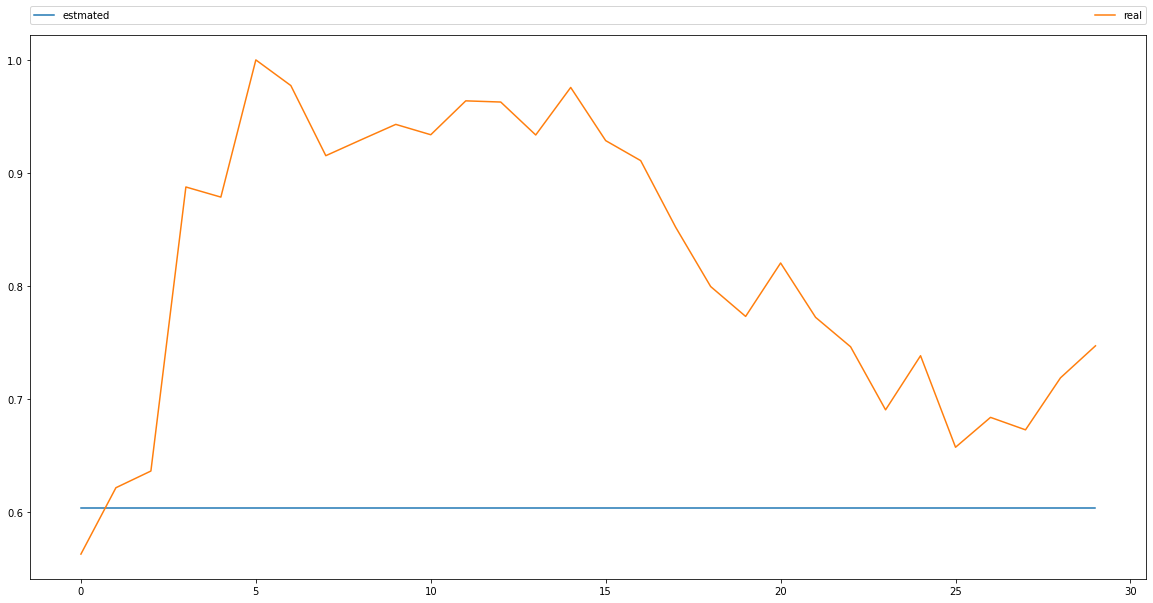

In [47]:
y_hat = regressor.fit(train_x1, train_y).predict(test_x1)
plt.plot(y_hat[:], label="estmated")
plt.plot(test_y[:], label="real")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [48]:
print("MAE:  ", utils.mae(y_hat, test_y))
print("RMSE: ", utils.rmse(y_hat, test_y))

MAE:   0.22077510887442262
RMSE:  0.25142558486781313


In [49]:
# IBIO

In [50]:
path = "./Data/IBIO2021.csv"
# Load data, with yesterday close price.
train_x0, train_y0, test_x0, test_y0 = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)
train_x0 = np.resize(train_x0, (training_count - history_size, history_size))
test_x0 = np.resize(test_x0, (count - training_count, history_size))
train_x1 = np.hstack((train_x0, train_x0))
test_x1 = np.hstack((test_x0, test_x0))
print(train_x0.shape)
print(test_x0.shape)


(1243, 8)
(1243, 8)
(1243, 8)
(1243, 8)
(180, 8)
(90, 60, 1)
(30, 60, 1)
(90, 60)
(30, 60)


In [51]:
path = "./Data/IBIO2021.csv"
date = datetime.datetime(2021,3,13)
# Load data, with today close price as ground truth.
_, train_y, _, test_y = utils.get_train_and_test_set(
    path, date, count, history_size, training_count
)


(1243, 8)
(1243, 8)
(1243, 8)
(1243, 8)
(180, 8)
(90, 60, 1)
(30, 60, 1)


In [52]:
criteria_params = ["mse", "mae"]
max_depth_params = [6, 9, 12, 15, 19, 25, 30, 50]
regressor, best_err = dtree.dicision_tree_model_selection(train_x1, train_y, criteria_params, max_depth_params)

mse 6 mean val MSE: 0.04026905406126774
mse 9 mean val MSE: 0.04014203942142872
mse 12 mean val MSE: 0.039131596596761964
mse 15 mean val MSE: 0.037035467494107466
mse 19 mean val MSE: 0.041918178972081076
mse 25 mean val MSE: 0.03893888365558316
mse 30 mean val MSE: 0.04020835104635504
mse 50 mean val MSE: 0.0425676701548232
mae 6 mean val MSE: 0.04176362533674645
mae 9 mean val MSE: 0.042192083192754054
mae 12 mean val MSE: 0.04007980011508182
mae 15 mean val MSE: 0.03959012043001421
mae 19 mean val MSE: 0.04292341604608728
mae 25 mean val MSE: 0.03981294222397447
mae 30 mean val MSE: 0.040521201180306284
mae 50 mean val MSE: 0.04087770481227056


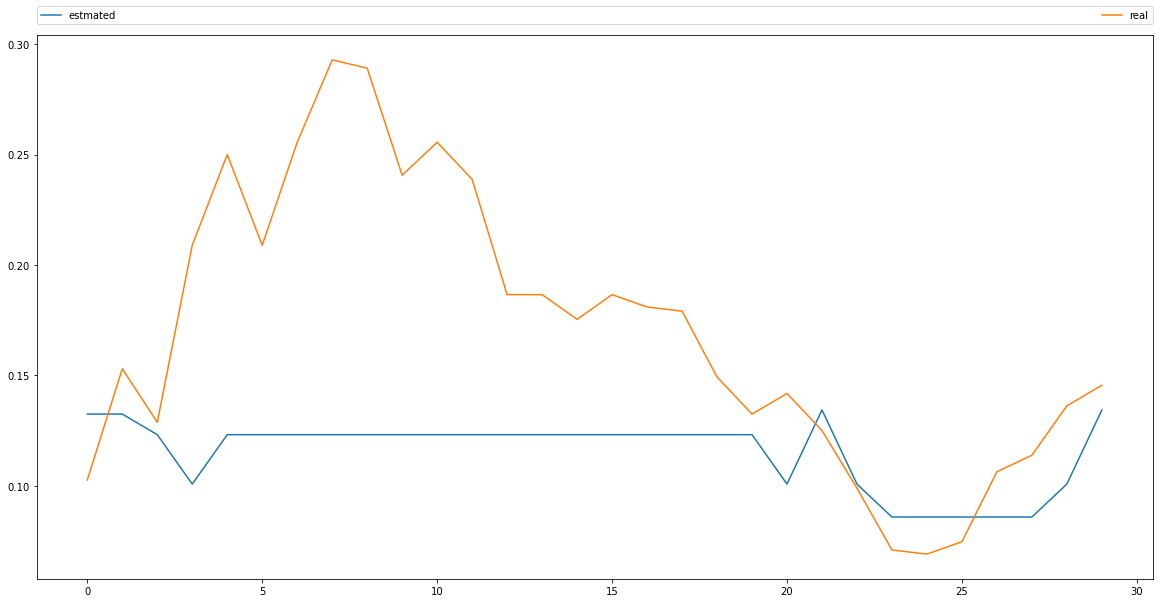

In [53]:
y_hat = regressor.fit(train_x1, train_y).predict(test_x1)
plt.plot(y_hat[:], label="estmated")
plt.plot(test_y[:], label="real")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [54]:
print("MAE:  ", utils.mae(y_hat, test_y))
print("RMSE: ", utils.rmse(y_hat, test_y))

MAE:   0.05976368159203981
RMSE:  0.07793879104544162
